### in this notebook will try to diferentiate images to find what images are similar to each other

In [1]:
from skimage import metrics 
from matplotlib import pyplot as plt 
import numpy as np
import cv2
import os

0.6198565979413823

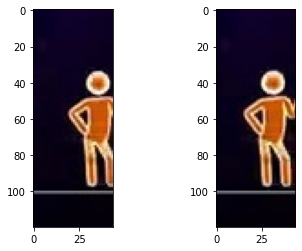

In [16]:
images = os.listdir("Test/just_dance_dataset/")
end = '_{0}'.format(images[0].split('_')[-1])
size = len(images)
A,B = 0,1

imgA = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(A,end))
imgB = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(B,end))

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgA)
ax[1].imshow(imgB)

ssim = metrics.structural_similarity(imgA, imgB, multichannel=True)
# ssim = measure.compare_ssim(imgA, imgB, multichannel = True)
# mse = measure.compare_mse(imgA, imgB)
# nrmse = measure.compare_nrmse(imgA, imgB)

ssim#,mse, nrmse

In [18]:
# building matrix of ssim

A = 0
first_sim = []
imgA = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(A,end))
for B in range(size):
    imgB = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(B,end))
    ssim = metrics.structural_similarity(imgA, imgB, multichannel = True)
    first_sim.append(ssim)
mean = np.mean(first_sim)

In [19]:
mean

0.36151242068213163

In [20]:
while A < size:
    ssim = 1
    imgA = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(A,end))
    cv2.imwrite('Test/just_dance_resampled/{0}{1}'.format(A,end),imgA)
    B = A 
    while ssim > mean and B < size:
        imgB = cv2.imread('Test/just_dance_dataset/{0}{1}'.format(B,end))
        ssim = metrics.structural_similarity(imgA, imgB, multichannel = True)
        B+=1
    A = B

In [15]:
len(os.listdir('Test/just_dance_resampled/'))

52